# Homework for CLIM 680: Climate Data

**Shammunul Islam (sislam27@mason.edu)**

## Temperature ☀️ analysis of South-Asia using APHRODITE Water Resources project's data

I tried to visually explore temperature data of South Asia data provided by [APHRODITE Water Resources project](https://www.chikyu.ac.jp/precip/english/downloads.html?fbclid=IwAR1P-1G9nxc8SQV0WfF2cA7mnGvRjI5RDB3RfEhpNuGBh2-im35TPNzDVAM). Using Python along with XArray, Cartopy, matplotlib I visualized maps of temperature. A comparison of temperature between 1961 and 2015 is also made. I also made an attempt to understand how June, July, August, September (JJAS) temperature changed over time by making an animation map where at each step of the animation, average temperature of JJAS is plotted.

This repository will be continuously updated as the course will go on.

### Data Description -- The APHRODITE Water Resources project

The APHRODITE Water Resources project is working on a series of precipitation products and this project completed its first phase in 2010 and embarked on its second phase in 2016, partnering with Hirosaki University, Kyoto University, and Chiba University. 

Daily mean temperature values are provided by their AphroTemp_V1808 at 0.50 and 0.25 degree grid resolutions. These readings are produced by extrapolating information from meteorological stations dispersed throughout the targeted area. After the release of AphroTemp_V1204R1, surface data from nations including India, Bhutan, Thailand, and Myanmar was included. The accuracy of the temperature readings in South Asia in the most recent version has been improved by this inclusion, along with updated interpolation methods and climatic data. For a better understanding of this dataset, you can refer to this [documentation](http://aphrodite.st.hirosaki-u.ac.jp/product/APHRO_V1808_TEMP/AphroTemp_V1808_readme.txt)

### The major characteristics of the dataset

- Spatial and Temporal Coverage

   * Spatial coverage      :  (MA) 60.0E - 150.0E, 15.0S - 55.0N
   * Spatial resolution    :  0.5 degree and 0.25 degree latitude/longitude
   * Temporal coverage     :  1961-2015
   * Temporal resolution   :  Daily

- Units
   * Daily mean temperature :  degC
   * Ratio of 0.05 grid box containing station(s) :  %

- Missing Code

   * Daily mean temperature :  -99.9
   * Ratio of 0.05 grid box containing station(s) :  -99.9

### Import all the necessary packages

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
#!pip install --user cartopy

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [68]:
fname = 'APHRO_MA_TAVE_025deg_V1808.1961.nc.nc'
ds_1961 = xr.open_dataset(fname)
ds_1961

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280, time: 365)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1961-12-31
Data variables:
    tave     (time, lat, lon) float32 ...
    rstn     (time, lat, lon) float32 ...
Attributes:
    title:    APHRO_MA V1808 daily temperature with 0.25deg grids

We see that this data has three coordinates, one corresponding to **lon** or longitude, **lat** or latitude and **time** which has 365 values or 365 days.

In [4]:
ds_mean_1961=ds_1961.mean(dim='time')

In [5]:
ds_mean_1961

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
Data variables:
    tave     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    rstn     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

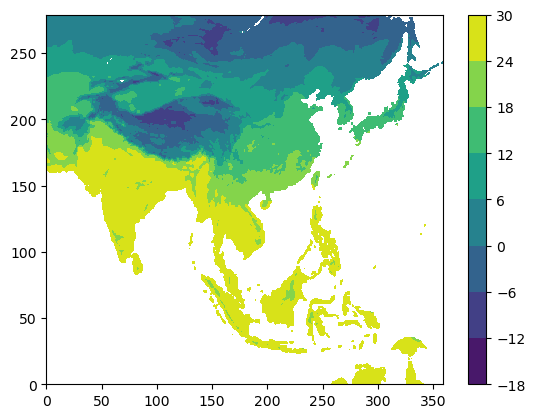

In [6]:
plt.contourf(ds_mean_1961['tave'])
plt.colorbar() ;

Now, let's plot a more refined map with more values for the colorbar.

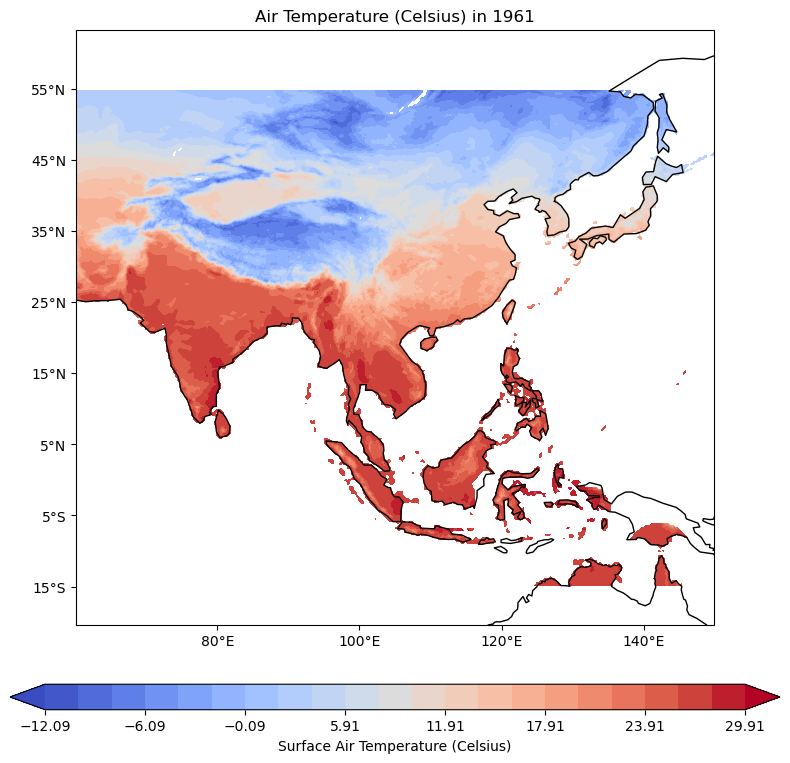

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

# Assuming ds_mean_1961 and ds_1961 are your data sources

# Make the figure larger
fig = plt.figure(figsize=(11, 8.5))

# Set the axes using the specified map projection
# Adjust the position of the map to leave space for the colorbar
ax = plt.axes([0.05, 0.2, 0.9, 0.7], projection=ccrs.PlateCarree())

# Add cyclic point to data
data = ds_mean_1961['tave']
data, lons = add_cyclic_point(data, coord=ds_1961['lon'])

# Define levels for finer intervals, ignoring NaNs
level_interval = 2  # Change this value as needed
levels = np.arange(np.nanmin(data), np.nanmax(data) + level_interval, level_interval)

# Make a filled contour plot with specified levels
cs = ax.contourf(lons, ds_1961['lat'], data, levels=levels,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
lon_range = np.arange(np.floor(ds_1961['lon'].min()), np.ceil(ds_1961['lon'].max()) + 1, 20)
ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
lat_range = np.arange(np.floor(ds_1961['lat'].min()), np.ceil(ds_1961['lat'].max()) + 1, 10)
ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Define the longitude and latitude range
ax.set_extent([ds_1961['lon'].min(), ds_1961['lon'].max(), ds_1961['lat'].min(), ds_1961['lat'].max()])

# Add title
plt.title("Air Temperature (Celsius) in 1961")

# Create a new axes for the colorbar just below the map
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03]) # Adjust these values as needed
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Surface Air Temperature (Celsius)')

plt.show()

Now, let's have a look at the temperature from 2015 and try to see if the temperature pattern looks similar or not.

We start by loading dataset for 2015.

In [3]:
fname = 'APHRO_MA_TAVE_025deg_V1808.2015.nc.nc'
ds_2015 = xr.open_dataset(fname)

Create a mean of temperature for 2015.

In [4]:
ds_mean_2015=ds_2015.mean(dim='time')

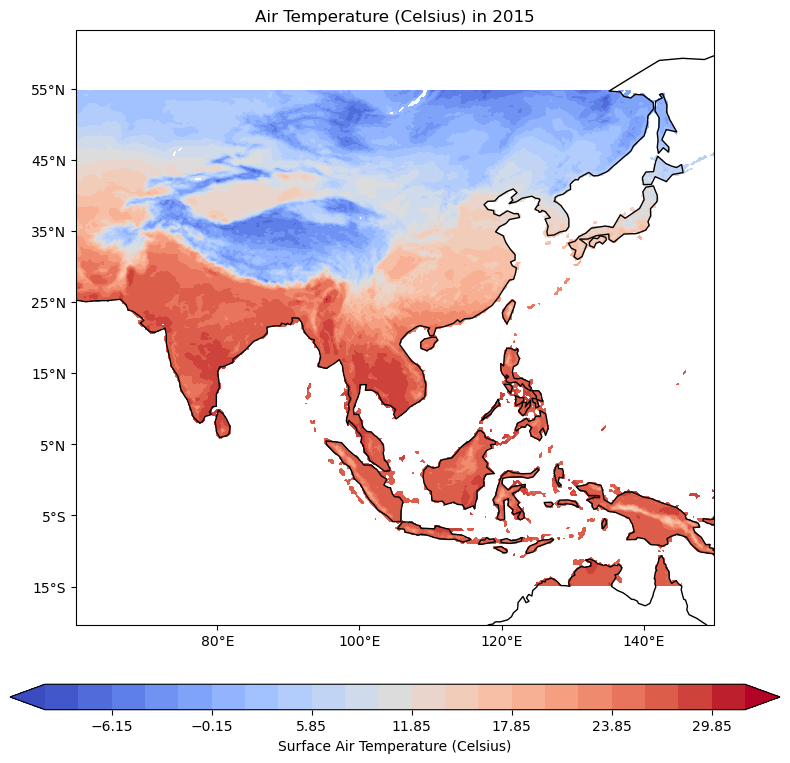

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11, 8.5))

# Set the axes using the specified map projection
# Adjust the position of the map to leave space for the colorbar
ax = plt.axes([0.05, 0.2, 0.9, 0.7], projection=ccrs.PlateCarree())

# Add cyclic point to data
data = ds_mean_2015['tave']
data, lons = add_cyclic_point(data, coord=ds_2015['lon'])

# Define levels for finer intervals, ignoring NaNs
level_interval = 2  # Change this value as needed
levels = np.arange(np.nanmin(data), np.nanmax(data) + level_interval, level_interval)

# Make a filled contour plot with specified levels
cs = ax.contourf(lons, ds_2015['lat'], data, levels=levels,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
lon_range = np.arange(np.floor(ds_2015['lon'].min()), np.ceil(ds_2015['lon'].max()) + 1, 20)
ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
lat_range = np.arange(np.floor(ds_2015['lat'].min()), np.ceil(ds_2015['lat'].max()) + 1, 10)
ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Define the longitude and latitude range
ax.set_extent([ds_2015['lon'].min(), ds_2015['lon'].max(), ds_2015['lat'].min(), ds_2015['lat'].max()])

# Add title
plt.title("Air Temperature (Celsius) in 2015")

# Create a new axes for the colorbar just below the map
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03]) # Adjust these values as needed
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Surface Air Temperature (Celsius)')

plt.show()

### Side-by-side plot comparison for 1961 and 2015

So, here we make a visual inspection of how the average surface air temperature in 2015 is different from 1965 for the same variable.

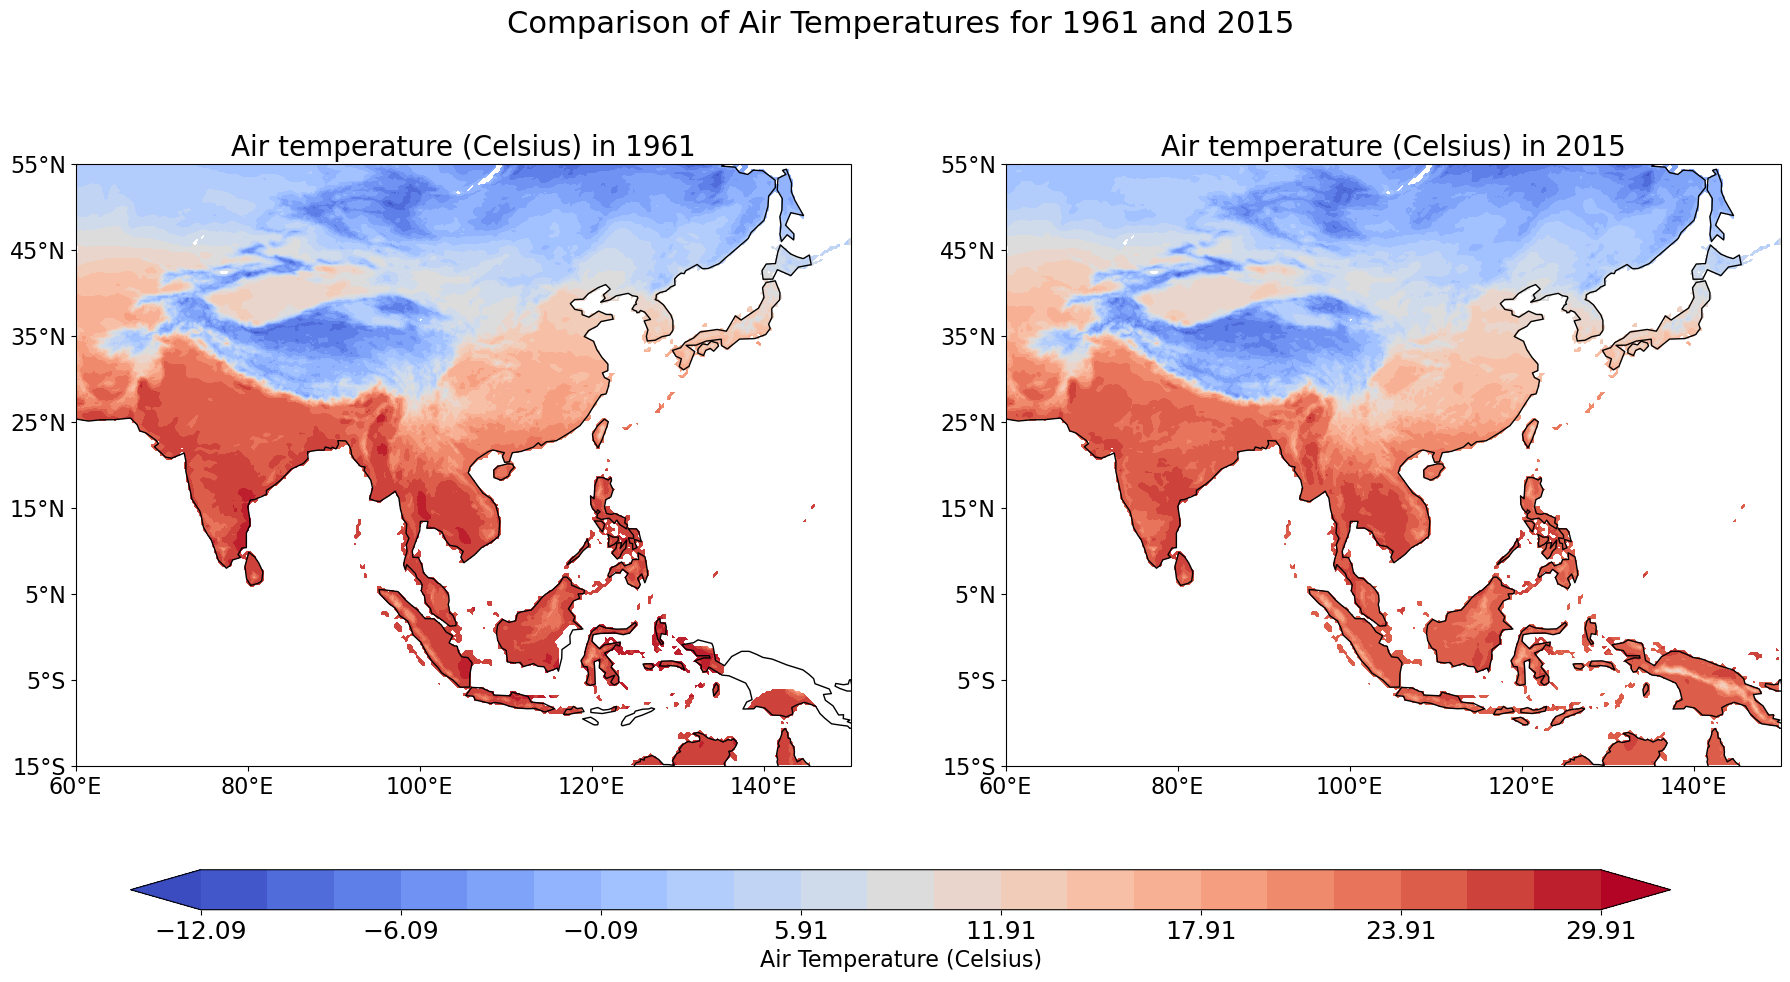

In [51]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

# Assuming ds_mean_1961, ds_1961, ds_mean_2015 are your data sources

# Create a 1x2 grid of subplots
fig = plt.figure(figsize=(22, 10))

# Manually set the subplots for precise control over layout
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

# Increase font size for labels and titles
plt.rcParams.update({'font.size': 16})
title_fontsize = 20
label_fontsize = 18

# Common settings for both plots
level_interval = 2
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

# Plot for 1961
data_1961 = ds_mean_1961['tave']
data_1961, lons_1961 = add_cyclic_point(data_1961, coord=ds_1961['lon'])
levels_1961 = np.arange(np.nanmin(data_1961), np.nanmax(data_1961) + level_interval, level_interval)

cs1 = ax1.contourf(lons_1961, ds_1961['lat'], data_1961, levels=levels_1961,
                   transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
ax1.coastlines()
ax1.set_xticks(np.arange(np.floor(ds_1961['lon'].min()), np.ceil(ds_1961['lon'].max()) + 1, 20), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(np.floor(ds_1961['lat'].min()), np.ceil(ds_1961['lat'].max()) + 1, 10), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title("Air temperature (Celsius) in 1961", fontsize=title_fontsize)

# Plot for 2015
data_2015 = ds_mean_2015['tave']
data_2015, lons_2015 = add_cyclic_point(data_2015, coord=ds_1961['lon'])
levels_2015 = np.arange(np.nanmin(data_2015), np.nanmax(data_2015) + level_interval, level_interval)

cs2 = ax2.contourf(lons_2015, ds_1961['lat'], data_2015, levels=levels_2015,
                   transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
ax2.coastlines()
ax2.set_xticks(np.arange(np.floor(ds_1961['lon'].min()), np.ceil(ds_1961['lon'].max()) + 1, 20), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(np.floor(ds_1961['lat'].min()), np.ceil(ds_1961['lat'].max()) + 1, 10), crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_title("Air temperature (Celsius) in 2015", fontsize=title_fontsize)

# Main title for the entire figure
fig.suptitle("Comparison of Air Temperatures for 1961 and 2015", fontsize=22, y=0.95)

# Position the colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.04])  # Adjusted to be closer to the maps
cbar = fig.colorbar(cs1, cax=cbar_ax, orientation='horizontal', label='Air Temperature (Celsius)')
cbar.ax.tick_params(labelsize=label_fontsize)

plt.show()

They almost looked like the same and it looks like there is no difference in mean temperature between 1961 and 2015. So, now we will make an anomaly plot between this two time steps and plot this.

### Anomaly plot for the change between 2015 and 1961

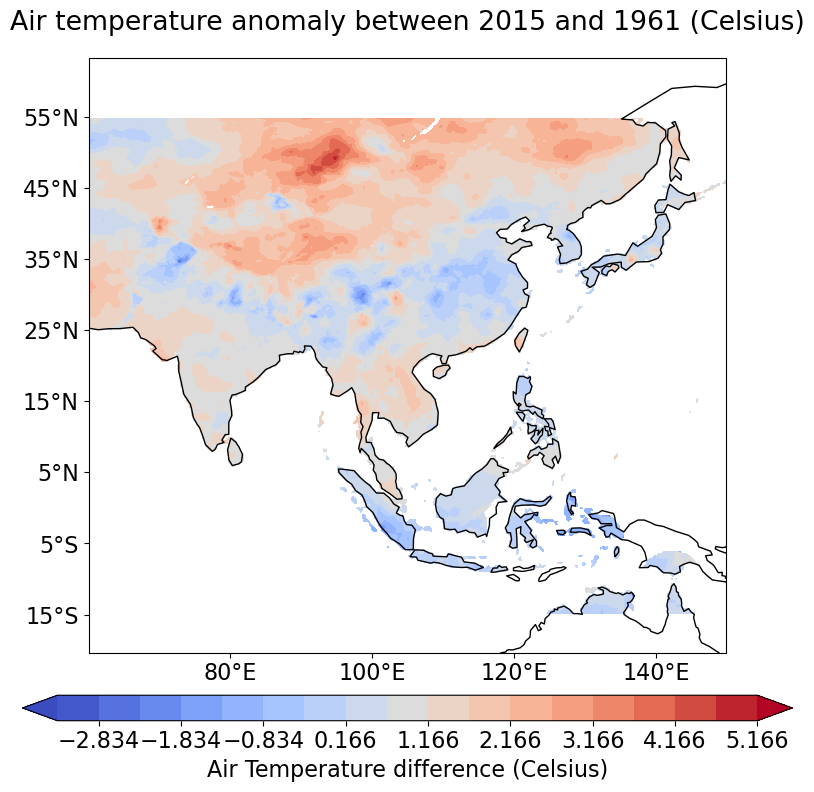

In [58]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

# Assuming anomaly, ds_2015 are your data sources

# Make the figure larger
fig = plt.figure(figsize=(11, 8.5))

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree(), position=[0.05, 0.15, 0.9, 0.7])  # Adjust the position of the map

# Add cyclic point to data
data = anomaly['tave']
data, lons = add_cyclic_point(data, coord=ds_2015['lon'])

# Define levels for finer intervals, considering a more detailed range
min_val = np.nanmin(data)
max_val = np.nanmax(data)
level_interval = 0.5  # Smaller interval for more granularity
levels = np.arange(min_val, max_val + level_interval, level_interval)

# Make a filled contour plot with specified levels
cs = ax.contourf(lons, ds_2015['lat'], data, levels=levels,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
lon_range = np.arange(np.floor(ds_2015['lon'].min()), np.ceil(ds_2015['lon'].max()) + 1, 20)
ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
lat_range = np.arange(np.floor(ds_2015['lat'].min()), np.ceil(ds_2015['lat'].max()) + 1, 10)
ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

# Define the longitude and latitude range
ax.set_extent([ds_2015['lon'].min(), ds_2015['lon'].max(), ds_2015['lat'].min(), ds_2015['lat'].max()])

# Add title with adjusted position
plt.title("Air temperature anomaly between 2015 and 1961 (Celsius)", pad=20)  # Increased padding for the title

# Reposition the colorbar to increase the gap from the map
cbar_ax = fig.add_axes([0.15, 0.07, 0.7, 0.03])  # Adjusted to increase the gap
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Air Temperature difference (Celsius)')

plt.show()

Now, we can see that there is actually some difference in air temperature between these time periods. We will now have a look at the summer time temperature difference or anomaly over this period. 

### Change of June, July, August, September temperature anomaly over the period from 1961 to 2015

To have a visual loo or understanding of the June, July, August, September (JJAS) air temperature between 1961 and 2015, I made an animation of the anomalies of JJAS temperature over this period. I used the average temperature for JJAS between 1961 and 2015 as the mean temperature (climatological) and then subtracted this from average JJAS temperature of each of the year between this period.

MovieWriter imagemagick unavailable; using Pillow instead.


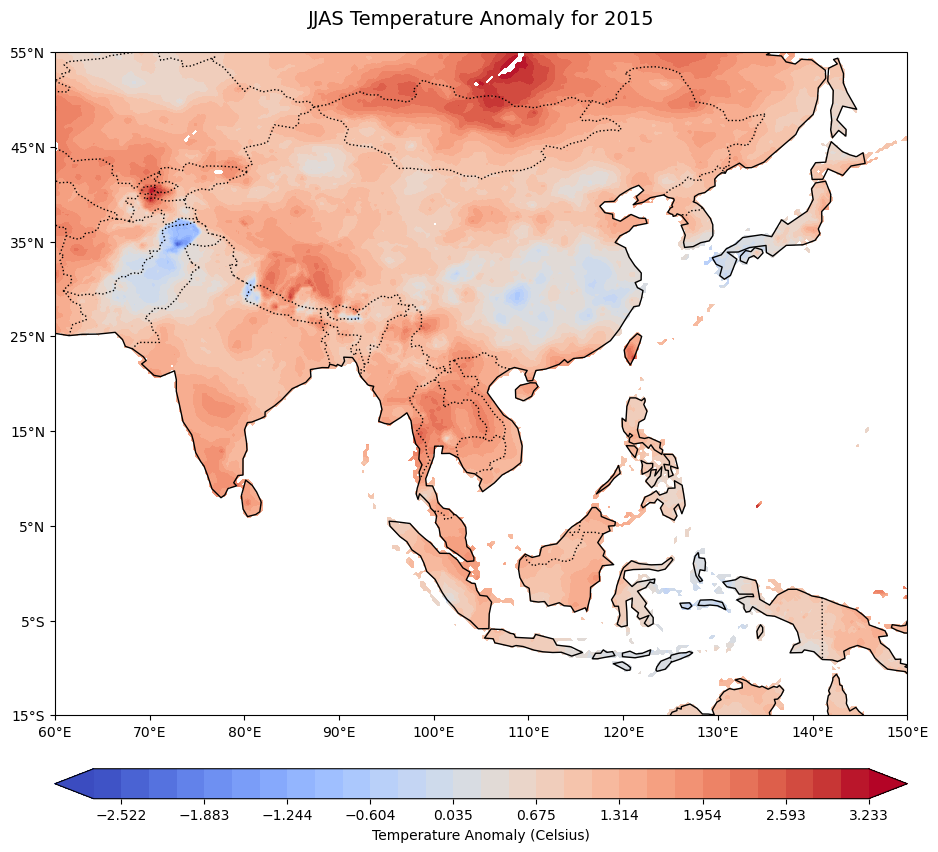

In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

def load_dataset(year):
    filename = f"APHRO_MA_TAVE_025deg_V1808.{year}.nc.nc"
    ds = xr.open_dataset(filename)
    return ds

def calculate_jjas_anomaly(year, long_term_mean):
    jjas_data = load_dataset(year)['tave'].sel(time=load_dataset(year)['time.month'].isin([6, 7, 8, 9])).mean(dim='time')
    anomaly = jjas_data - long_term_mean
    return anomaly

def plot_data(data, ax):
    lons, lats = np.meshgrid(data['lon'], data['lat'])
    # Adjust the level_interval for finer gradations
    level_interval = 0.2  # Smaller interval for more detailed color gradations
    levels = np.linspace(data.min(), data.max(), num=int((data.max() - data.min()) / level_interval))
    cs = ax.contourf(lons, lats, data, levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
    return cs

# Compute the long-term JJAS mean (1961-2015)
long_term_mean = xr.concat([load_dataset(year)['tave'].sel(time=load_dataset(year)['time.month'].isin([6, 7, 8, 9])) for year in range(1961, 2016)], dim='time').mean(dim='time')

# Create the initial figure and axis with adjusted vertical size
fig, ax = plt.subplots(figsize=(11, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Load the first year's data to initialize the colorbar
initial_data = calculate_jjas_anomaly(1961, long_term_mean)
cs = plot_data(initial_data, ax)

# Adjust the colorbar to align with the map's extent
cbar_ax = fig.add_axes([0.125, 0.08, 0.775, 0.03])  # Slightly raise the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Temperature Anomaly (Celsius)')

def update_plot(year):
    ax.clear()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    data = calculate_jjas_anomaly(year, long_term_mean)
    cs = plot_data(data, ax)
    ax.set_title(f"JJAS Temperature Anomaly for {year}", fontsize=14, pad=20)
    
    # Set dynamic longitude and latitude labels based on the data
    lon_range = np.arange(np.floor(data['lon'].min()), np.ceil(data['lon'].max()) + 1, 10)
    lat_range = np.arange(np.floor(data['lat'].min()), np.ceil(data['lat'].max()) + 1, 10)
    ax.set_xticks(lon_range, crs=ccrs.PlateCarree())
    ax.set_yticks(lat_range, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())

    return cs

# Create the animation
years = range(1961, 2016)
ani = animation.FuncAnimation(fig, update_plot, frames=years, repeat=True, blit=False)

# Save the animation as a .gif
ani.save('jjas_temperature_anomaly.gif', writer='imagemagick', fps=1.8)

plt.show()

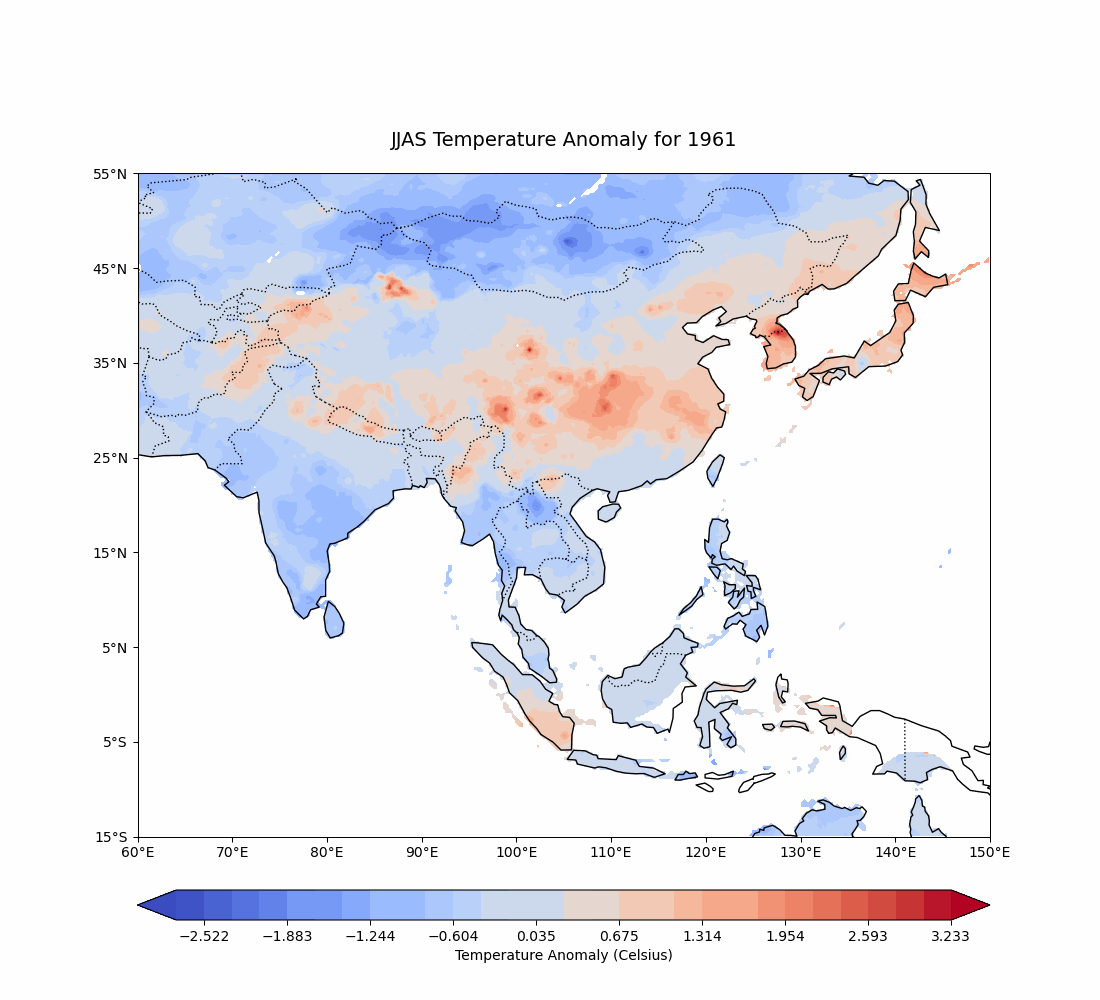

In [24]:
from IPython.display import display, Image

# Display the GIF in Jupyter Notebook
display(Image(filename='jjas_temperature_anomaly.gif'))

We can see that temperature changed 

### Climatological map for each month

Here, I have calculated 50 year average from 1961 to 2010 for temperature for each month. Thus, we get a climatological map for all the 12 months over this region.

/tmp/ipykernel_3946687/825234240.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


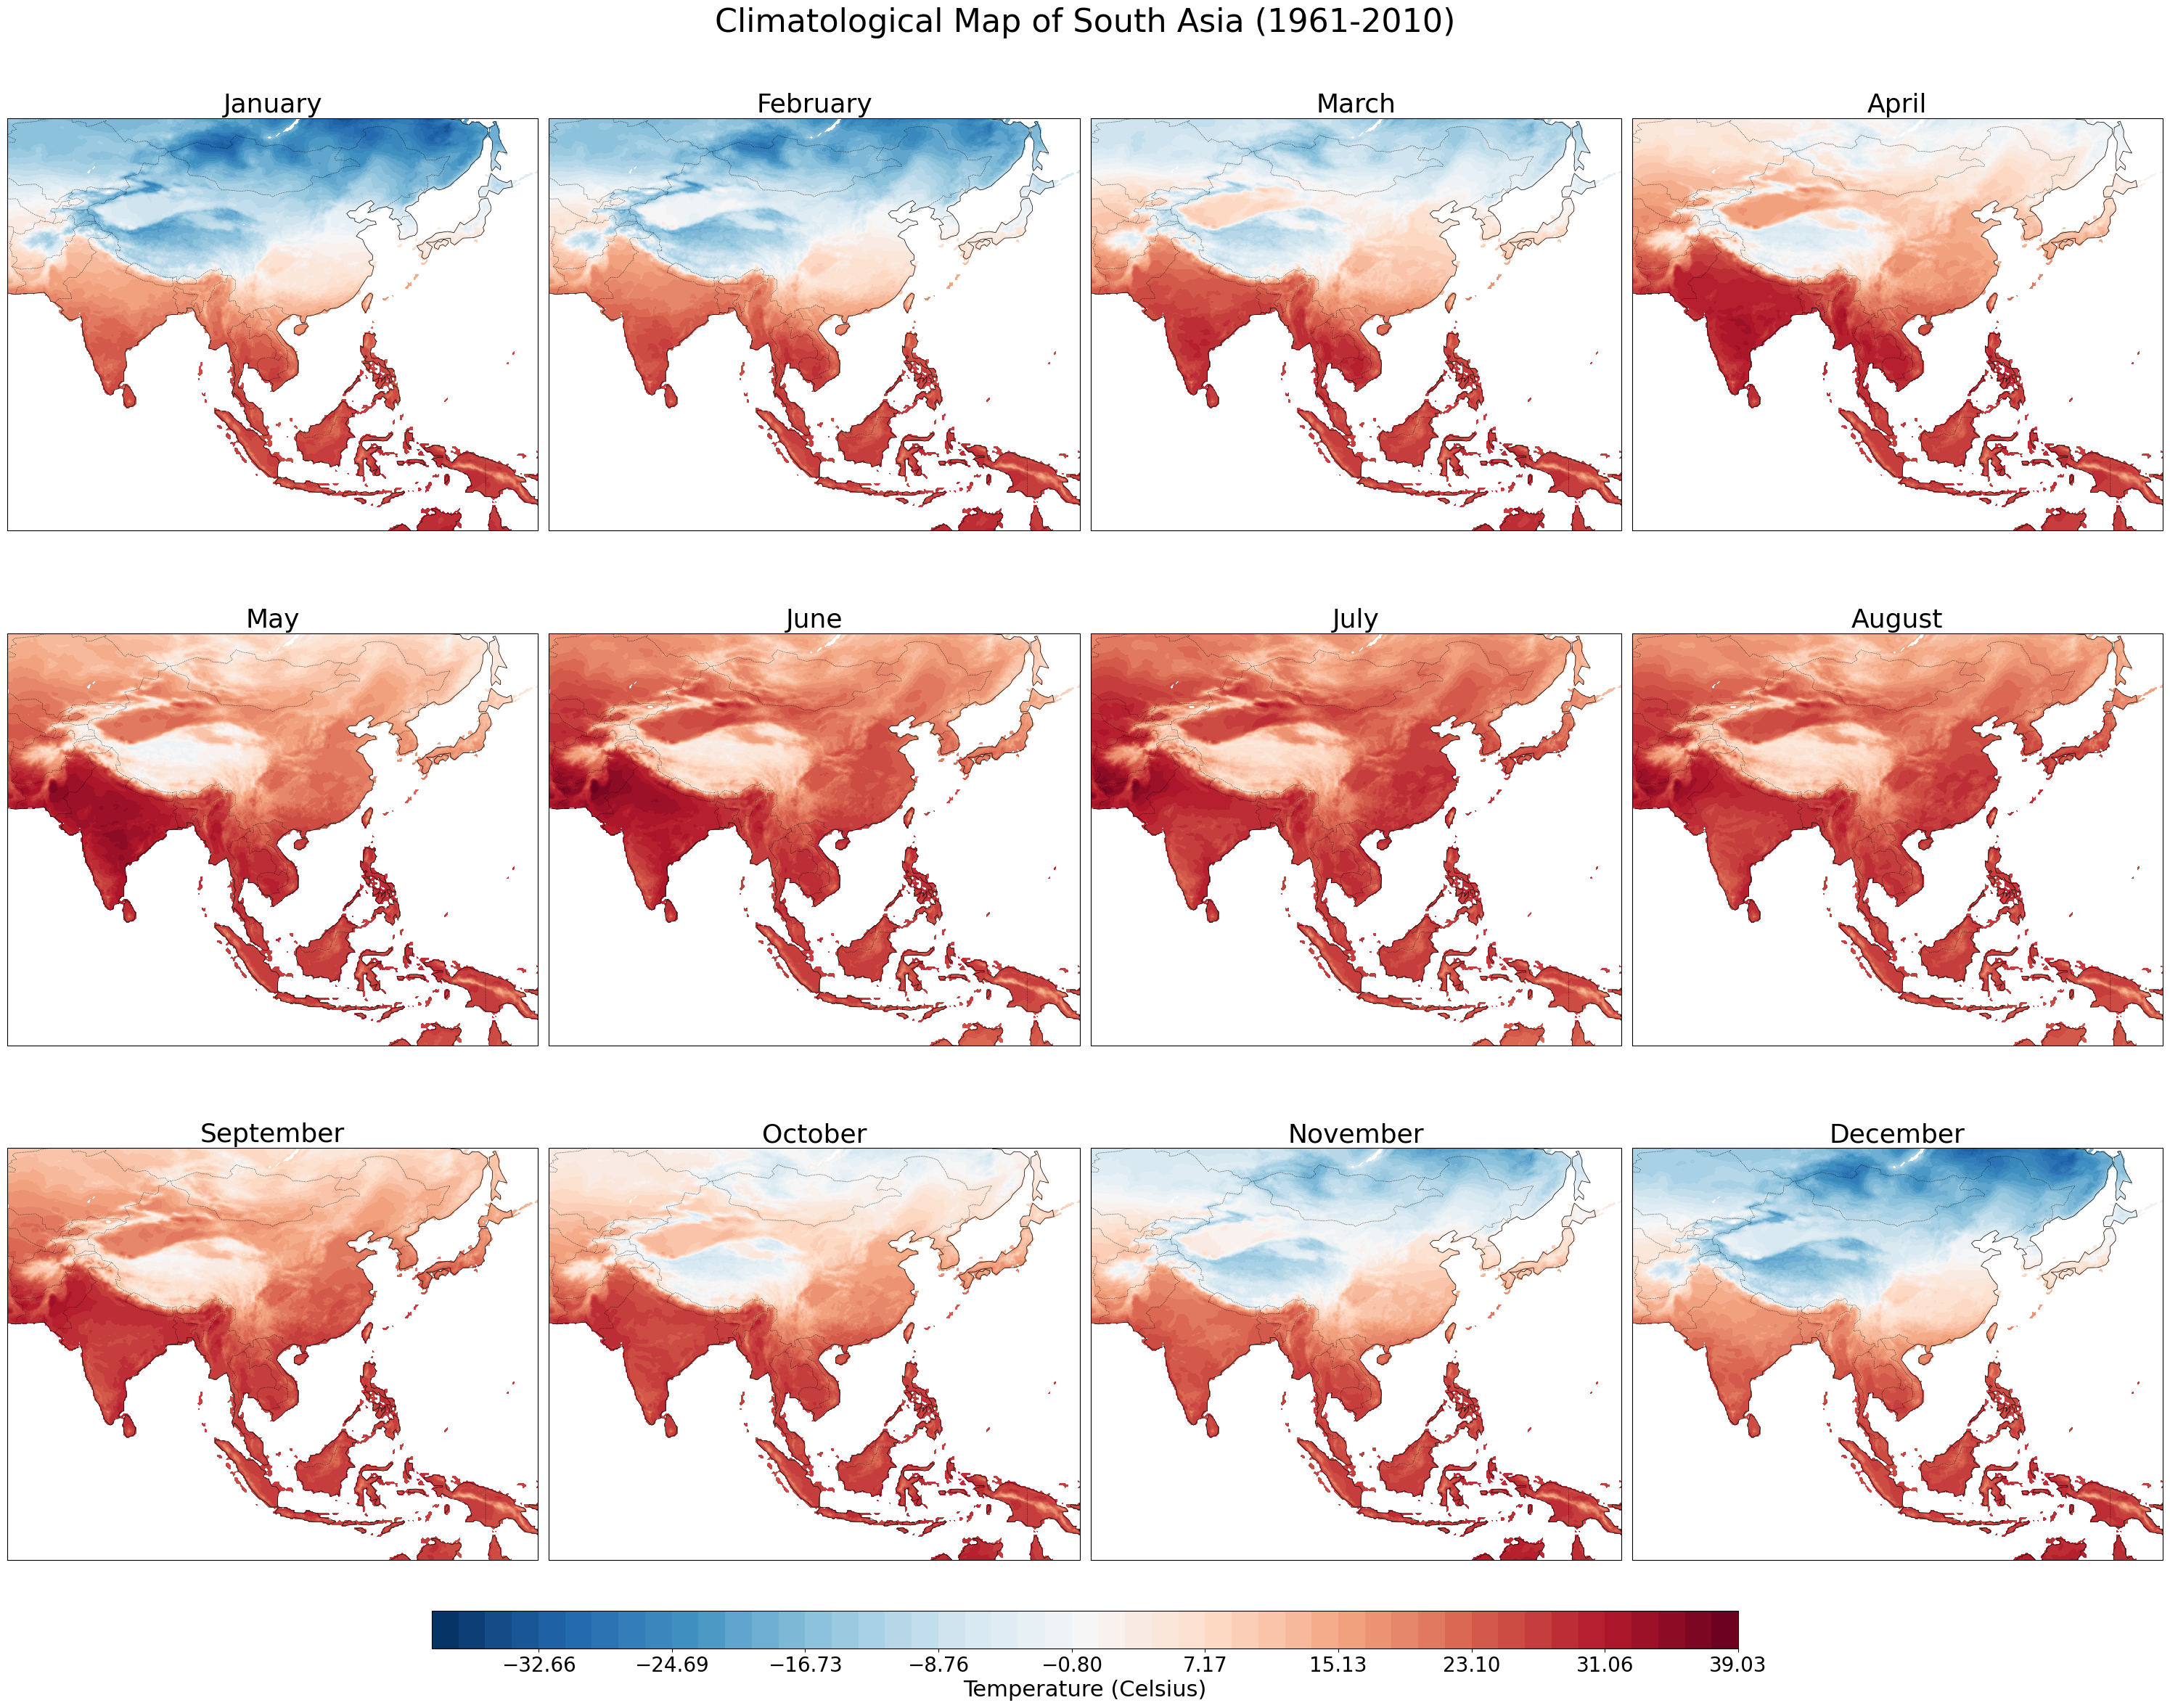

In [14]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def extract_monthly_data(filename):
    ds = xr.open_dataset(filename)
    monthly_data = ds['tave'].groupby('time.month').mean('time')
    return monthly_data

def plot_monthly_data(climatology, month, ax, vmin, vmax, levels):
    lons, lats = np.meshgrid(climatology['lon'], climatology['lat'])
    cs = ax.contourf(lons, lats, climatology.sel(month=month), levels=levels, cmap='RdBu_r', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.set_title(month_name(month), fontsize=26)  # Increased font size for map titles
    return cs

def month_name(month_num):
    import calendar
    return calendar.month_name[month_num]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 26), subplot_kw={'projection': ccrs.PlateCarree()})

all_data = []
for year in range(1961, 2011):
    filename = f"APHRO_MA_TAVE_025deg_V1808.{year}.nc.nc"
    all_data.append(extract_monthly_data(filename))

combined_data = xr.concat(all_data, dim='year')
climatology = combined_data.mean(dim='year')

vmax = np.abs(climatology.max())
vmin = -vmax

levels = np.linspace(vmin, vmax, 50)

for month, ax in zip(range(1, 13), axes.ravel()):
    cs = plot_monthly_data(climatology, month, ax, vmin, vmax, levels)

cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
cb = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cb.ax.tick_params(labelsize=20)
cb.set_label('Temperature (Celsius)', size=22)

fig.suptitle("Climatological Map of South Asia (1961-2010)", fontsize=32, y=0.92)

# Reducing the vertical space between rows of maps
plt.subplots_adjust(top=0.88, hspace=0.05, wspace=0.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure to a file
fig.savefig('climatological_map.png', dpi=300, bbox_inches='tight')

plt.show()